# **QUANTUM CHEMISTRY THEORY**


 **Jean Paul FAYE**

Quantum specialist,

**CMC MICROSYSTEMS**

# **Why this activity**?

The aim of this activity is to show how to transform the Hamiltonian describing the electronic structure of molecules in second quantization form,  which will be used to map to quantum computing operations.

In this transformation, we need to compute one-body and two-body integrals. In this activity, we will learn how to calculate those integrals using `Pyscf` package. 

# **Electronic structure Hamiltonian** 

We consider a molecule composed of $N_n$ nuclei of mass $M_I$ and $N_e$ electrons of mass $m_e$. The Hamiltonian describing this molecule is written as:
\begin{eqnarray}
    H = -\sum^{N_e}_{i=1}\frac{\hbar^2}{2m_e}\nabla^2_i-\sum^{N_n}_{I=1}\frac{\hbar^2}{2M_I}\nabla^2_I -\sum^{N_e,N_n}_{i,I=1}\frac{e^2}{4\pi\epsilon_0}\frac{Z_I}{|{\bf r}_i-{\bf R}_I|} + \frac{1}{2}\sum^{N_e}_{\substack{i,j = 1\\i<j}}\frac{e^2}{4\pi\epsilon_0}\frac{1}{|{\bf r}_i-{\bf r}_j|} + 
    \frac{1}{2}\sum^{N_n}_{\substack{I,J = 1\\I<J}}\frac{e^2}{4\pi\epsilon_0}\frac{Z_IZ_J}{|{\bf R}_I-{\bf R}_J|},
\end{eqnarray}
where the first and second terms are the kinetic energy of electrons and nuclei, respectively. The thirt term is the Coulomb attractive interaction between electrons and nuclei. The two last terms are the electron-electron and nuclei-nuclei interactions, respectively.
In this equation, $\hbar$ is Planck's constant $h$ divided by $2\pi$, and $e$ is the electron charge. To simplify, it is convenient to rewrite the Hamiltonian in **Hartree atomic units**. 

# **How to write the Hamiltonian in Hartree atomic units?**



Let us consider the hydrogen atom, which is composed by one electron and one nucleus. The Schrödinger equation for hydrogen atom is:
\begin{equation}
\left(-\frac{\hbar^2}{2M_I}\nabla^2 -\frac{\hbar^2}{2m_e}\nabla^2 -\frac{e^2}{4\pi\epsilon_0}\frac{1}{{|\bf r|}}\right)\Phi = E\Phi 
\end{equation}
In order to cast this equation into Hartree atomic units, we do the following change of variable: ${\bf r} \rightarrow \lambda {\bf r}^{\prime}$, which transform the Schrödinger equation as follow:
\begin{equation}
\left(-\frac{\hbar^2}{2m_e\lambda^2}\nabla^{\prime 2} -\frac{e^2}{4\pi\epsilon_0\lambda}\frac{1}{{|\bf r^{\prime}|}}\right)\Phi^{\prime} = E\Phi^{\prime}. 
\end{equation}
To factorize the constant in front of the electron kinetic and potential energies, we require that 
\begin{equation}
\frac{\hbar^2}{m_e\lambda^2} = \frac{e^2}{4\pi\epsilon_0\lambda} = E_a,
\end{equation} 
where $E_a$ is the unit of energy called the **Hartree**.
Solving this equation, we obtain $\lambda = \frac{4\pi\epsilon_0\hbar^2}{m_ee^2} = a_0$, where $a_0 = 0.52918\times 10^{-11} $ m is the Bohr radius.
We can write now:
\begin{equation}
\left(-\frac{\nabla^{\prime 2}}{2} -\frac{1}{{|\bf r^{\prime}|}}\right)\Phi^{\prime} = E^{\prime}\Phi^{\prime} 
\end{equation}
with $E^{\prime} = E/E_a$.

Using this procedure, the Hamiltonian of the molecule takes the form
\begin{eqnarray}
    H = -\sum^{N_e}_{i=1}\frac{\nabla^2_i}{2}-\sum^{N_n}_{I=1}\frac{\nabla^2_I}{2M_{I/e}} -\sum^{N_e, N_n}_{i,I = 1}\frac{Z_I}{|{\bf r}_i-{\bf R}_I|} + \frac{1}{2}\sum^{N_e}_{\substack{i,j = 1\\i<j}}\frac{1}{|{\bf r}_i-{\bf r}_j|} + 
    \frac{1}{2}\sum^{N_n}_{\substack{I,J = 1\\I<J}}\frac{Z_I Z_J}{|{\bf R}_I-{\bf R}_J|}
\end{eqnarray}
where $M_{I/e} = M_I/m_e$.

# **Born-Oppenheimer approximation**

As the mass of a nucleus is around one thousand times heavier than the mass of one electron, one can simplify the Hamiltonian by considering the nuclei to be fixed charge points. We end up with a Hamiltonian that describes the motion of electrons in the ion's potential. This is the so-called Born-Oppenheimer approximation. In this approximation, we separate the Hamiltonian of the nuclei part from the electronic part:
\begin{eqnarray}
H = H_n + H_e,
\end{eqnarray}
with the nuclei Hamiltonian defined as:
\begin{eqnarray}
   H_n = -\sum^{N_n}_{I=1}\frac{\nabla^2_I}{2M_{I/e}}   + 
    \frac{1}{2}\sum^{N_n}_{\substack{I,J = 1\\I<J}}\frac{Z_I Z_J}{|{\bf R}_I-{\bf R}_J|},
\end{eqnarray}
and the electronic Hamiltonian
\begin{eqnarray}
    H_e = -\sum^N_{i}\frac{\nabla^2_i}{2} -\sum^N_{i=1}\sum^M_{I=1}\frac{Z_I}{|{\bf r}_i-{\bf R}_I|} + \sum^N_{i=1}\sum_{j\neq i}\frac{1}{|{\bf r}_i-{\bf r}_j|}, 
\end{eqnarray}
is the Hamiltonian of interest.
It is composed by the kinetic energy term $T$ and the electron-electron interaction $V$,
where $T$ and $V$ are defined as:
\begin{eqnarray}
T = \sum^{N_e}_{i= 1}T_i = -\sum^{N_e}_{i= 1}\left(\frac{\nabla^2_i}{2} +\sum^{N_n}_{I=1}\frac{Z_I}{|{\bf r}_i-{\bf R}_I|}\right),  \\ V = \sum^{N_e}_{i=1}\sum_{j>i}V({\bf r}_i, {\bf r}_j) = \sum^{N_e}_{i=1}\sum_{j>i}\frac{1}{|{\bf r}_i-{\bf r}_j|}.
\end{eqnarray}

The total wavefunction is also seperated $\Psi({\bf R}, {\bf r}) = \Phi_n({\bf R})\psi_e({\bf R}, {\bf r})$. Thus, in the Born-Oppenheimer approximation, the electronic structure of the molecule is obtained by solving the Schrödinger equation
\begin{equation}
H_e \psi_e({\bf R}, {\bf r}) = E_e({\bf R}) \psi_e({\bf R}, {\bf r})
\end{equation}
for a fixed nuclear configuration ${\bf R}$. 





# **Many-electron wavefucntion and single-particle wave function**

In the absence of electron-electron interaction, the electronic Hamiltonian $H_e$ is given by the sum of single-electron Hamiltonians. Thus, the $N_e$-electron wavefunction can be written as the product of the eigenfunctions $\phi_j$ of the single-electron Hamiltonian. In this case, the many-electron wavefunction takes the form
\begin{equation}
\psi_e^\prime ({\bf x}) = \prod_{j=1}^{N_e} \phi_j({\bf x}_j)= \phi_1({\bf x}_1)\phi_2({\bf x}_2) \ldots \phi_{N_e}({\bf r}_{N_e}).
\end{equation}
The basis states for the $N_e$-electron system can be built from the complete orthonormal single-particle basis $\{ \phi_j({\bf x}_j)\}$,
\begin{equation}
\sum_j\phi^*_j({\bf x}_j^{\prime})\phi_j({\bf x}_j) = \delta({\bf x}_j- {\bf x}^{\prime}_j) ~ ~ ~ \text{and}~ ~ ~ \int d {\bf x}~\phi_i^*({\bf x}_i)\phi_j({\bf x}_j) = \delta_{i,j},
\end{equation}
where ${\bf x}_i = ({\bf r}_i, \sigma_i)$ describing both spatial position ${\bf r}_i$ and spin $\sigma_i = \uparrow, \downarrow $ of an electron.

However, the wavefucntion $\psi_e^\prime ({\bf x})$ it is not anti-symmetric, i.e., if we interchange any two of the electron coordinates ${\bf x}_i$, the wavefunction does not change signal. For electrons, the wavefunction must be antisymetric, and we can write $\psi_e^\prime({\bf x})$ in a antisymetrized way by acting the fermionic anti-symmetrization operator $A$ on $\psi_e^\prime ({\bf x})$:
\begin{equation}
A\psi_e^\prime ({\bf x}) = \frac{1}{\sqrt{N_e!}}
\begin{vmatrix}
\phi_{1}({\bf x}_1) & \phi_{1}({\bf x}_2) & \cdots & \phi_{1}({\bf x}_{N_e}) \\ 
\phi_{2}({\bf x}_1) & \phi_{2}({\bf x}_2) & \cdots & \phi_{2}({\bf x}_{N_e}) \\ 
\cdots & \cdots & \cdots & \cdots \\ 
\phi_{N_e} ({\bf x}_1) & \phi_{N_e}({\bf x}_2) & \cdots & \phi_{N_e}({\bf x}_{N_e})
\end{vmatrix} = \langle {\bf x}|\phi_{1}\phi_{2}\cdots\phi_{N_e}\rangle,
\end{equation}
which is known as the **Slater determinant** .

In the presence of electron-electron interaction, $\psi_e^\prime ({\bf x})$ is no longer an eigenfunction of $H_e$. However, as $\psi_e^\prime ({\bf x})$ forms a complete set, the $N_e$-electron wavefucntion can be expanded in terms of Slater determinants
\begin{equation}
\psi_e({\bf x})= \sum_{j} c_j \psi_e^\prime (j,{\bf x}), 
\end{equation}
where $j = 1, \ldots, N_o$ (number of orbitals) denotes the various states $\phi_j$ that can exist in a determinant.  

# **Operators in first quantization**



*   **One-electron operators**

The one-electron operators defined on single-particle states described by the coordinate ${\bf x}_j$ can be writen as:
\begin{equation}
T = \sum^{N_e}_{j=1}T_j = \sum^{N_e}_{j=1}\sum_{kl}T_{kl}|\phi_k({\bf x}_j)\rangle\langle\phi_l({\bf x}_j)| ~~ \text{with} ~~ T_{kl} = \int d{\bf x}_j\phi^*_l({\bf x}_j)T({\bf x}_j)\phi_k({\bf x}_j)
\end{equation}

*   **Two-electron operators**

The two-electron operators defined on single-particle states described by the coordinates ${\bf x}_j$ and ${\bf x}_i$ can be writen as:
\begin{equation}
V = \frac{1}{2}\sum^{N_e}_{i,j\neq i = 1}V_{ij} = \frac{1}{2}\sum^{N_e}_{i,j\neq i = 1}\sum_{klmn}V_{klmn}|\phi_m({\bf x}_i)\rangle|\phi_n({\bf x}_j)\rangle\langle\phi_k({\bf x}_j)|\langle\phi_l({\bf x}_i)|,
\end{equation}
with,
\begin{equation}
V_{klmn} = \int d{\bf x}_j\phi^*_m({\bf x}_i)\phi^*_n({\bf x}_j)V({\bf x}_i-{\bf x}_j)\phi_k({\bf x}_i)\phi_l({\bf x}_j)
\end{equation}


# **Occupation number representation**

We showed that total electron wavefunction can be written as a linear combination of Slater determinantes. Slater determinants are very cumbersome to work, even in the absence of interactions. However, to simplify the description of $\psi_e$, we can use the **occupation number representation**. In the occupation number representation, we list the number of electrons, $n_{j}$, in each occupied state $\phi_j$. 

In this representation, we write $\psi^{\prime}_e$ as  $|n\rangle = |n_{N_o},n_{N_o-1},\cdots, n_{1}\rangle$. For electrons, $n_{j} $=$ 1$ if $\phi_{j}$ is occupied and $n_{j} $=$ 0$ if $\phi_{j}$ is empty. The vector $|n\rangle$ is called the occupation number vector and the space of all such vectors is known as Fock space. The second quantization defines **creation** and **annihilation** operators to manipulate this occupation number vector. 

# **Creation and Annihilation operators**

In the second quantization description, creation $c^{\dagger}_j$ and annihilation $c_j$ operators are defined to manipulate the state $|n\rangle$. The operator $n_j = c^{\dagger}_j c_j$ gives the number of electron at orbital $\phi_j$. The creation and annihilation operators satisfy the anti-commutation relations:
\begin{equation}
\{c_i,c^{\dagger}_j\} = \delta_{i,j}, ~~~~ \{c_i,c_j\} = 0,~~~~\{c^{\dagger}_i,c^{\dagger}_j\} = 0.
\end{equation}

The action of $c^{\dagger}_j$ is to create an electron at $\phi_j$,  and $c_j$ annihilates an electron at $\phi_j$. Their action on the state  $|n\rangle$ is as follow:
\begin{equation}
c_j|n_{N_o},n_{N_o-1},\cdots,n_j, \cdots n_1\rangle = \delta_{n_j,1}(-1)^{\sum^{j-1}_{i=1}n_i}|n_{N_o},n_{N_o-1},\cdots,0, \cdots n_1\rangle \\
c^{\dagger}_j|n_{N_o},n_{N_o-1},\cdots,n_j, \cdots n_1\rangle = \delta_{n_j,0}(-1)^{\sum^{j-1}_{i=1}n_i}|n_{N_o},n_{N_o-1},\cdots,1, \cdots n_1\rangle \\
n_j |n_{N_o},n_{N_o-1},\cdots,n_j, \cdots n_1\rangle = n_j|n_{N_o},n_{N_o-1},\cdots,n_j, \cdots n_1\rangle
\end{equation} 

We identify the first and second quantized basis states as:
\begin{equation}
A |\phi_{{N_o}}({\bf x}_{N_o})\rangle |\phi_{{N_o-1}}({\bf x}_{N_o-1})\rangle  \ldots |\phi_{1}({\bf x}_1)\rangle = c^{\dagger}_{{N_o}} c^{\dagger}_{{N_o-1}}  \dots c^{\dagger}_{1}|00\ldots 0\rangle
\end{equation}

# **Form of operators in second quantization**

In second quantization all operators can be expressed in terms of creation and annihilation operators.

**One-body operators**

Let us construct the representation of the one-body operator $T$, using:
 \begin{equation}
A |\phi_{{N_o}}({\bf x}_{N_o})\rangle   \ldots |\phi_{1}({\bf x}_1)\rangle = c^{\dagger}_{{N_o}}  \dots  c^{\dagger}_{1}|0\rangle
\end{equation}


\begin{equation}
T|\phi_{{N_o}}({\bf x}_{N_o})\rangle \ldots |\phi_{1}({\bf x}_1)\rangle = \sum^{N_o}_{j = 1}\sum_{kl}T_{kl}\delta_{lj}|\phi_{{N_o}}({\bf x}_{N_o})\rangle \ldots |\phi_{k}({\bf x}_j)\rangle \ldots \phi_{1}({\bf x}_1)\rangle \\
T|c^{\dagger}_{{N_o}} \dots  c^{\dagger}_{1}|0\rangle = \sum_{kl}T_{kl}\sum^{N_o}_{j=1} \delta_{lj}c^{\dagger}_{{N_o}} \dots c^{\dagger}_{k} \dots c^{\dagger}_{1}|0\rangle
\end{equation}
To make the kets on the two sides of the equation look alike, we will reinsert $c^{\dagger}_j$ at position $j$. The $\phi_j$ may appear, say, $p$ times leading to a contribution of $(c^{\dagger}_{j})^p|0\rangle$ on the left and $c^{\dagger}_{k}(c^{\dagger}_{j})^{p-1}|0\rangle = c^{\dagger}_{k}(\frac{1}{p}c_jc^{\dagger}_{j})(c^{\dagger}_{j})^{p-1}|0\rangle = (\frac{1}{p}c^{\dagger}_{k}c_j)(c^{\dagger}_{j})^{p}|0\rangle$ on the right. We find that:
\begin{equation}
T(|c^{\dagger}_{{N_o}} \dots  c^{\dagger}_{1}|0\rangle) = \sum_{kl}T_{kl}c^{\dagger}_{k}c_l(c^{\dagger}_{{N_o}} \dots c^{\dagger}_{1}|0\rangle),
\end{equation}
since $\sum^{N_o}_{j=1} \frac{1}{p}\delta_{lj} = 1$. This result is valid for any basis states:
 \begin{equation}
T = \sum_{kl}T_{kl}c^{\dagger}_{k}c_l ~~ \text{with} ~~ T_{kl} =-\int d {\bf x}~\phi^*_{k}({\bf x}) \frac{\nabla^2}{2}\phi_{l}({\bf x}) -\int d {\bf x}~\phi^*_{k}({\bf x})\sum^M_{I=1}\frac{1}{|{\bf r}-{\bf R}_I|}\phi_{l}({\bf x})
\end{equation}
Remember that $\phi_{j}({\bf x}) = \varphi_{j}({\bf r})~\chi_\sigma$, where $\sigma = \uparrow, \downarrow$ defines the spin-orbital states.

**Two-body operators** 

Following the similar procedure as in one-body term, the two-body term can be written as:
\begin{equation}
V = \sum_{ijkl} V_{ijkl} c^{\dagger}_{i}c^{\dagger}_{j}c_{k}c_{l} \end{equation} 
with
\begin{equation}  V_{ijkl} = \int d {\bf x_1}d {\bf x_2}~\phi^*_{i}({\bf x_1}) \phi^*_{j}({\bf x_2}) \frac{1}{|{\bf x_1}-{\bf x_2}|}\phi_{k}({\bf x_2}) \phi_{l}({\bf x_1})  
\end{equation}

================================================================================
# **QUANTUM CHEMISTRY CODING SESSION**
================================================================================

The true orbital basis $\phi_j({\bf r})$ can be obtained by numerically solving the Schrödinger equation using grid-based methods which is very expensive. Indeed, it is not applicable for many molecules. To solve this problem, we simulate orbital basis $\phi_j({\bf r})$ using a discret set of functions.

The most simple discret set of functions are the **Slater Type Orbital$\text{-n}$ Gaussian** (`STO-nG`):

\begin{equation}
\phi_j({\bf r}) \rightarrow R^{\text{STO-nG}}_{nl}(r) = A \alpha^{l/2}_{nl} r^l e^{-\alpha_{nl}~ r^2},
\end{equation}
where $\alpha_{nl}$ is a fitting parameter, $n$ and $l$ are quantum numbers, and $A$ a normalization constant.

We will use the `Pyscf` package to estimate the one- and the two-body integrals.

# **Installing Pyscf**

https://sunqm.github.io/pyscf/install.html

In [ ]:
pip install pyscf

# **Importing Pyscf modules**

In [1]:
from pyscf import gto
import numpy as np
import matplotlib.pyplot as plt

Let us define a function which sets to zero all values that are equal or less than $10^{-9}$. This makes our arrays more readable.

In [2]:
def cut_zeros(a):
    a[np.abs(a) < 1e-9] = 0
    return a

# **Defining the molecule using `GTO`**

Let us consider the hydrogen molecule H$_2$. Each hydrogen has one electron. We will consider that the electron is in the lowest energy state `1s`.






*   **Defining the molecule geometry**

We put the two hydrogen atoms in the $z$-axis separated by the distance $d$.

In [3]:
d = 0.735  # the distance between the two hydrogen atoms.
geometry = [['H',(0,0,-d/2)],['H',(0,0,d/2)]]



*   **Choosing the discret basis**




We choose the type of discret functions to approximate the atomic orbital.

In [4]:
# basis 
sto_3g = "sto_3g" 



*   **Building the molecule**




We construct the molecule using the Gaussian type orbital and built it.

In [6]:
mol = gto.Mole()
mol.atom = geometry
mol.basis = sto_3g
mol.build()

The atomic orbitals included in the calculation can be shown using the function `ao_labels()`. How many atomic orbitals are included depend on the type of basis. In the case of `sto-3g` basis, we include the `1s` for each hydrogen atom.

In [7]:
mol.ao_labels()

['0 H 1s    ', '1 H 1s    ']

 **Overlap matrix S**

The `mol` object defined above allow us to compute different type of integrals. **These integrals are perfomed using the atomic orbitals**. We start by the overlap matrix $S$ between the `1s` orbitals  whose matrix elements are given by:
\begin{align}
    s_{ij} = \int \rm{d}{\pmb{r}}\, \phi_i^\ast(\pmb{r}) \phi_j(\pmb{r})
\end{align}

In Pyscf, we obtain the overlap matrix $S$ using:

In [8]:
S = mol.intor("int1e_ovlp")
print(S)

[[1.         0.66314574]
 [0.66314574 1.        ]]


**Constructing an orthonormal basis**

We see that the two `1s` orbitals from the H atoms are overlaping since $S$ is not diagonal. We want a matrix which transforms the atomic orbital states to orthonormal states. To obtain this matrix, first, let's diagonalize the overlap matrix.


In [9]:
eig_value_S, eig_vector_S = np.linalg.eigh(S)
order = np.argsort(eig_value_S)
eig_vector_S = eig_vector_S[:, order]
print(eig_vector_S)

[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


The unitary matrix `eig_vector_S` does not diagonalize $S$ such that the eigenvalues equal to one.

In [10]:
print(eig_value_S)

[0.33685426 1.66314574]


We will create a rotation matrix that transforms the $S$ matrix into an identity matrix. This is done as follow, we divide `eig_vector_S` eigenvectors by the square root of their eigenvalues.

In [11]:
ao2oo = eig_vector_S/np.sqrt(eig_value_S[None,:])
print(ao2oo)

[[-1.21832731  0.54830202]
 [ 1.21832731  0.54830202]]


To verify that the `ao2oo` matrix transforms $S$ to identity matrix, we calculate:

In [12]:
print(cut_zeros((ao2oo.T @ S @ ao2oo)))


[[1. 0.]
 [0. 1.]]


The matrix `ao2oo`  transforms the atomic orbitals `ao` basis to an orthonormal `oo` basis. It will be used to write the one-body and two-body terms in the orthonomal basis.

# **One-body integrals**



The one-body iterm is composed of two integrals:
\begin{equation} 
T_{kl} =-\int d {\bf x}~\phi^*_{k}({\bf x}) \frac{\nabla^2}{2}\phi_{l}({\bf x}) -\int d {\bf x}~\phi^*_{k}({\bf x})\sum^M_{I=1}\frac{1}{|{\bf r}-{\bf R}_I|}\phi_{l}({\bf x})
\end{equation}

$T$  **in the atomic orbitals basis**.

In pyscf, we use the function `intor` to calculate these integrals in the atomic orbital basis first. 

In [13]:
T_ao = mol.intor("int1e_kin") + mol.intor("int1e_nuc")
print(T_ao)

[[-1.12421758 -0.9652574 ]
 [-0.9652574  -1.12421758]]


In the `ao`, the one-body term is not diagonal. This will force us to consider terms as $T_{12}c^{\dagger}_1c_2$ in addition to  $T_{11}c^{\dagger}_1c_1 ~ \text{and} ~ T_{22}c^{\dagger}_2c_2$.

$T$ **in the orthonormal basis**.

To eliminate the terms as $T_{12}c^{\dagger}_1c_2$,  we apply the rotation matrix `ao2oo` to `T_ao`, which write it in the orthonormal basis.

In [20]:
T_oo = np.einsum('mi,nj,mn->ij', ao2oo,ao2oo,T_ao)
print(T_oo)
print(cut_zeros(T_oo))

[[-4.71896007e-01  0.00000000e+00]
 [ 3.33066907e-16 -1.25633907e+00]]
[[-0.47189601  0.        ]
 [ 0.         -1.25633907]]


Now the terms $T_{12} = T_{21} = 0$ in the orthonormal basis.

# **Two-body integral**


The two-body integral is given by:
\begin{equation}  V_{ijkl} = \int d {\bf x_1}d {\bf x_2}~\phi^*_{i}({\bf x_1}) \phi^*_{j}({\bf x_2}) \frac{1}{|{\bf x_1}-{\bf x_2}|}\phi_{k}({\bf x_2}) \phi_{l}({\bf x_1})  
\end{equation}

$V$ **in atomic orbitals basis**.

In [21]:
V_ao = mol.intor("int2e")
print(V_ao)

[[[[0.77460594 0.44744572]
   [0.44744572 0.57187698]]

  [[0.44744572 0.3009177 ]
   [0.3009177  0.44744572]]]


 [[[0.44744572 0.3009177 ]
   [0.3009177  0.44744572]]

  [[0.57187698 0.44744572]
   [0.44744572 0.77460594]]]]


Many terms $V_{ijkl}$ need to be included. We write  $V$ into the orthonormal basis.

$V$ **in orthonormal basis**

In [22]:
V_oo = np.einsum('mi,nj,ok,pl,mnop->ijkl',ao2oo,ao2oo,ao2oo,ao2oo, V_ao)
print(cut_zeros(V_oo))
print(V_oo.shape)

[[[[0.69857372 0.        ]
   [0.         0.66458173]]

  [[0.         0.1809312 ]
   [0.1809312  0.        ]]]


 [[[0.         0.1809312 ]
   [0.1809312  0.        ]]

  [[0.66458173 0.        ]
   [0.         0.67571015]]]]
(2, 2, 2, 2)


# **Adding the spin component**

To add the spin component, we just need to make two copies for spin $\uparrow$ and $\downarrow$.


*    For the **one-body term**, this is a tensor product of identity matrix with `T_oo`. This leads to a four states basis.


In [23]:
T_spin = np.eye(2)
T_spin_oo = cut_zeros(np.kron(T_spin,T_oo))
print(T_spin_oo)

[[-0.47189601  0.          0.          0.        ]
 [ 0.         -1.25633907  0.          0.        ]
 [ 0.          0.         -0.47189601  0.        ]
 [ 0.          0.          0.         -1.25633907]]




*   Like the one body term, we need to get the two body term in the four states basis.



In [24]:
V_spin = np.kron(np.eye(2)[:,:,None,None],np.eye(2)[None,None,:,:])
V_spin_oo = np.kron(V_spin,V_oo)
print(V_spin_oo)

[[[[0.69857372 0.         0.         0.        ]
   [0.         0.66458173 0.         0.        ]
   [0.         0.         0.69857372 0.        ]
   [0.         0.         0.         0.66458173]]

  [[0.         0.1809312  0.         0.        ]
   [0.1809312  0.         0.         0.        ]
   [0.         0.         0.         0.1809312 ]
   [0.         0.         0.1809312  0.        ]]

  [[0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]]

  [[0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]]]


 [[[0.         0.1809312  0.         0.        ]
   [0.1809312  0.         0.         0.        ]
   [0.         0.         0.         0.1809312 ]
   [0.         0.         0.1809312  0.        ]]

  [[0.66

# **For molecules with more than 2 orbitals.**

For molecules with more than two atomic orbitals, the transformation from `ao` to `oo` basis does not diagonalize the one-body term $T_{oo}$. To construct a basis where $T_{oo}$ is diagonal, we find the transformation from the `oo` basis to a molecular `mo` basis.

In [25]:
eig_value_T_oo, eig_vector_T_oo = np.linalg.eigh(T_oo)
order = np.argsort(eig_value_T_oo)
oo2mo = eig_vector_T_oo[:, order]
ao2mo = ao2oo @ oo2mo

Transform $T$ to `mo`:

In [26]:
T_mo = np.einsum('mi,nj,mn->ij', ao2mo,ao2mo,T_ao)
print(cut_zeros(T_mo))

[[-1.25633907  0.        ]
 [ 0.         -0.47189601]]


Transform $V$ to `mo`:


In [27]:
V_mo = np.einsum('mi,nj,ok,pl,mnop->ijkl',ao2mo,ao2mo,ao2mo,ao2mo, V_ao)
print(cut_zeros(V_mo))

[[[[0.67571015 0.        ]
   [0.         0.66458173]]

  [[0.         0.1809312 ]
   [0.1809312  0.        ]]]


 [[[0.         0.1809312 ]
   [0.1809312  0.        ]]

  [[0.66458173 0.        ]
   [0.         0.69857372]]]]


# **Visualizing the states in different basis**.

We now show how to visualize the wavefunctions in one dimension in different basis:


# **Using AO basis**

In [28]:
coords = np.zeros((1000,3))
coords[:,2] = np.linspace(-4,4,1000)
ao_wf = mol.eval_gto('GTOval_cart',coords)

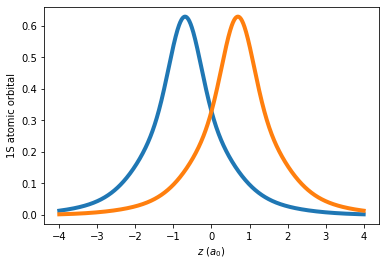

In [29]:
fig, ax = plt.subplots(1,1)
ax.plot(coords[:,2],ao_wf,'-', lw = 4)
ax.set_xlabel('$z$ ($a_0$)')
ax.set_ylabel('1S atomic orbital')
plt.show()

# **Using OO**

AO wave function into OO wave function.

In [30]:
oo_wf = ao_wf @ ao2oo


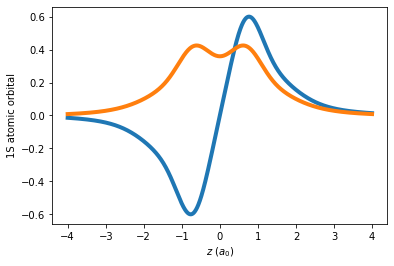

In [31]:
fig, ax = plt.subplots(1,1)
ax.plot(coords[:,2],oo_wf,'-', lw = 4)
ax.set_xlabel('$z$ ($a_0$)')
ax.set_ylabel('1S atomic orbital')
plt.show()

# **Using mo**

AO wave function into MO wave function.

In [32]:
mo_wf = ao_wf @ ao2mo

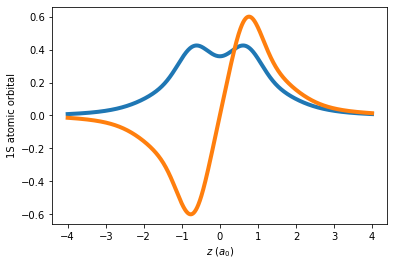

In [33]:
fig, ax = plt.subplots(1,1)
ax.plot(coords[:,2],mo_wf,'-', lw = 4)
ax.set_xlabel('$z$ ($a_0$)')
ax.set_ylabel('1S atomic orbital')
plt.show()